## Assignment : 14

<pre>
1. Download the preprocessed DonorsChoose data from here <a href='https://drive.google.com/file/d/1GU3LIJJ3zS1xLXXe-sdItSJHtI5txjVO/view?usp=sharing'>Dataset</a>
2. Split the data into train, cv, and test
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a href='https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric. you need to print the AUC value for each epoch. Note: you should NOT use the tf.metric.auc
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>. 
7. You should Save the best model weights.
8. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
9. Use Categorical Cross Entropy as Loss to minimize.
10. try to get AUC more than 0.8 for atleast one model
</pre>

##LSTM CELL
 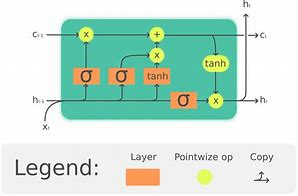

> LSTM (Long Short Term Memory) is a special type of Recurrent Neural Network(RNN) which mitigates the issues of Standard RNN : 
1. Vanishing Gradient Descent (Loss of information through time)
2. Exploding Gradient Descent (accumulation of large error gradients resulting in very large update and may results in NaN)

> LSTMs are capable of learning long term dependencies by remembering information for long periods.

>LSTMs work in 3-step process: 
1. Forget gate: Decides which information to delete that is not important from previous timestamp
2. Input Gate: Determines which information to let through based on its significance in the current time step
3. Output Gate: Allows the passed-in information to impact the output in current time step


In [ ]:
#gdown means download large file from google drive
!gdown --id 1GU3LIJJ3zS1xLXXe-sdItSJHtI5txjVO

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GU3LIJJ3zS1xLXXe-sdItSJHtI5txjVO
To: /content/preprocessed_data.csv
100% 124M/124M [00:03<00:00, 34.5MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
df = pd.read_csv("preprocessed_data.csv")
df.shape

(109248, 9)

In [ ]:
print("Any Null values in the data :",df.isnull().values.any())
print(" ")
print("Any duplicate values in the data :",df.duplicated().any())

Any Null values in the data : False
 
Any duplicate values in the data : True


In [ ]:
print("Number of duplicates in the data",df[df.duplicated()].shape)

#drop_duplicates()- deletes the duplicate values keeping the first one
df = df.drop_duplicates()
print("Any duplicate values in the data :",df.duplicated().any())
df.shape

Number of duplicates in the data (109, 9)
Any duplicate values in the data : False


(109139, 9)

In [ ]:
df.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [ ]:
#checking datatypes for each column
df.dtypes

school_state                                     object
teacher_prefix                                   object
project_grade_category                           object
teacher_number_of_previously_posted_projects      int64
project_is_approved                               int64
clean_categories                                 object
clean_subcategories                              object
essay                                            object
price                                           float64
dtype: object

<Axes: xlabel='project_is_approved', ylabel='count'>

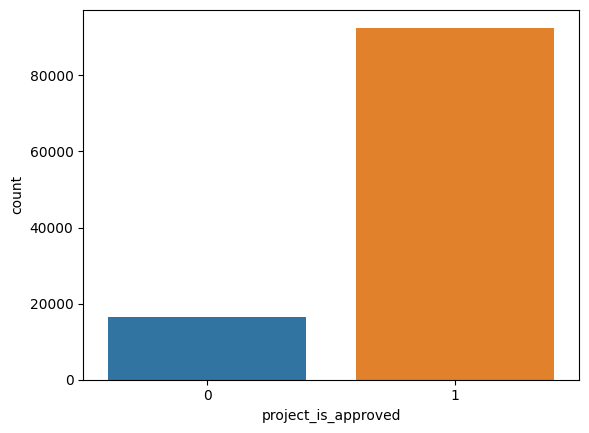

In [ ]:
#checking how the distribution is in the target 
sns.countplot(data = df, x='project_is_approved')

> We can clearly say that it is imabalanced dataset so we use stratified sampling while splitting the data into train,test and cv

In [ ]:
Y = df['project_is_approved']
X = df.drop('project_is_approved', axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
encoder_y = encoder.transform(Y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, encoder_y, stratify = encoder_y, random_state = 42, test_size = 0.15)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, stratify = y_train, random_state = 42, test_size = 0.15)

print("Training data : ",x_train.shape,y_train.shape)
print("Validation data : ",x_cv.shape,y_cv.shape)
print("Training data : ",x_test.shape,y_test.shape)

Training data :  (78852, 8) (78852,)
Validation data :  (13916, 8) (13916,)
Training data :  (16371, 8) (16371,)


### Model-1

Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, Flatten, LSTM, GlobalMaxPool1D
import tensorflow as tf
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant
import pickle
from tensorflow.keras import layers
import os
from tensorflow.keras.layers import Input,Dense,Conv1D,Flatten,Embedding,MaxPool1D,Concatenate,Dropout,BatchNormalization


### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 




<h2><font color='pink'> <b>COLUMN : ESSAY</b></font></h3>





In [ ]:
# wget means web get.. here we are downloading GloVe vectors from stanford website in zip format
!wget --header="Host: downloads.cs.stanford.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36 Edg/107.0.1418.26" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://nlp.stanford.edu/" --header="Cookie: _ga=GA1.2.1821491739.1667662731; _gid=GA1.2.677505410.1667662731" --header="Connection: keep-alive" "https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip" -c -O 'glove.6B.zip'

--2023-05-05 09:49:55--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  4.96MB/s    in 2m 42s  

2023-05-05 09:52:37 (5.09 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
!unzip glove.6B.zip -d glove.6B

Archive:  glove.6B.zip
  inflating: glove.6B/glove.6B.50d.txt  
  inflating: glove.6B/glove.6B.100d.txt  
  inflating: glove.6B/glove.6B.200d.txt  
  inflating: glove.6B/glove.6B.300d.txt  


### 1. Performing Word Embedding :

> Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.

> In Word embeddings words are dense vector representation   where a vector represents the projection of the word into a continuous vector space , while BOW are sparse representation.

>The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used.

> The position of a word in the learned vector space is referred to as its embedding.

>Here we are implementing word embedding by using GloVe(Global Vectors) which is pre-trained. [more](https://nlp.stanford.edu/projects/glove/)


> <font color='YELLOW'> <b>PAD SEQUENCES </b></font>


In [ ]:
#checking for the longest text data in x_train, so that we can pad every text into equal sizes
seq_len =[len(s) for s in x_train['essay'].values]
seq_len.sort(reverse = True)
print("Max number of words in entire text data is: ",seq_len[0])
print("Min number of words in entire text data is :",seq_len[-1])

Max number of words in entire text data is:  2657
Min number of words in entire text data is : 515


In [ ]:
print("90 percentile value: ",np.percentile(np.array(seq_len), 90))
print("95 percentile value: ",np.percentile(np.array(seq_len), 95))
print("98 percentile value: ",np.percentile(np.array(seq_len), 98))

90 percentile value:  1468.0
95 percentile value:  1633.0
98 percentile value:  1811.0


In [ ]:
max_len = 1600

> <font color='YELLOW'> <b> TOKENIZATION</b></font>

In [ ]:
print("Before tokenization:" ,x_train.essay[5])
print()
print("Performing tokenization...")
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(x_train['essay'].values) #------>Updates internal vocabulary based on a list of texts

x_train_token  = tokenizer.texts_to_sequences(x_train['essay'].values)  #----->Transforms each text in texts to a sequence of integers.
x_test_token = tokenizer.texts_to_sequences(x_test['essay'].values)
x_cv_token  = tokenizer.texts_to_sequences(x_cv['essay'].values)

vocab_size = len(tokenizer.word_index) + 1
print("vocabulary size = ",vocab_size)
print("After tokenization: ",x_train_token[5])

Before tokenization: it end school year routines run course students need boost curriculum enter breakout box my students prove knowledge content solving riddles finding clues lead unlocking box prize my students desire challenges movement collaboration they thrive rigor far successful content engaging rich still fun my students working developing teammates one works best group i work school holds bar student achievement high i would like raise bar even breakout box i design different clues using specific content knowledge get students solve puzzles search unlocking breakout box this activity used subject areas students working teams whole class even individually i able use materials year round review content unit fun engaging way keeps students highly motivated prove learning donations project immediately improve classroom changing routines students end long difficult year behaviors begin become issue a breakout box provide us fun interactive way break routine still build cognitive sw

In [ ]:
#padding the text data 
print("Before padding length of sequence =",len(x_train_token[5]))
print()
print("Performing padding...")
x_train_pad_seq = tf.keras.utils.pad_sequences(sequences = x_train_token,
                                       maxlen=max_len,
                                       padding='post'
                                      )

x_test_pad_seq= tf.keras.utils.pad_sequences(sequences = x_test_token,
                                       maxlen=max_len,
                                       padding='post'
                                      )

x_cv_pad_seq = tf.keras.utils.pad_sequences(sequences = x_cv_token,
                                       maxlen=max_len,
                                       padding='post'
                                      )

print("After padding length of sequence = ",len(x_train_pad_seq[5]))


Before padding length of sequence = 168

Performing padding...
After padding length of sequence =  1600


In [ ]:
from tqdm.notebook import tqdm

def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

model = loadGloveModel('/content/glove.6B/glove.6B.100d.txt')

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tqdm(tokenizer.word_index.items()):
	embedding_vector = model.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

print(len(embedding_matrix))
print()
print(embedding_matrix.shape)

Loading Glove Model


0it [00:00, ?it/s]

Done. 400000  words loaded!


  0%|          | 0/49662 [00:00<?, ?it/s]

49663

(49663, 100)


> Here we converted every word in the train data vocabulary to the 300 dimensional dense vector representation by GloVe 

> <font color='lime'> <b> EMBEDDING LAYER for essay</b></font>



```
1. len(tokenizer.word_index) + 1 = calculates the size of the vocabulary, which is the number of unique words in the text data plus one (for the "out of vocabulary" token).
2. '100' specifies the dimensionality of the embedding space.
3. 'weights=[embedding_matrix]' =  initializes the embedding weights with pre-trained word embeddings. embedding_matrix is a numpy array of shape (vocabulary_size, embedding_dim) that contains the pre-trained embeddings for each word in the vocabulary.
4. 'trainable=False' =  freezes the weights of the embedding layer so that they do not get updated during training.
5. '(Input_seq_total_text_data)' applies the embedding layer to the input sequence of text data.```



In [ ]:
#ref: https://stackoverflow.com/questions/49987261/what-is-the-difference-between-cudnnlstm-and-lstm-in-keras
#embedding layer for essay 
Input_seq_total_text_data = Input(shape= max_len, dtype='int32',name='essay')
embedding_layer_essay = Embedding(len(tokenizer.word_index)+1,100,weights = [embedding_matrix],trainable=False)(Input_seq_total_text_data)
lstm = CuDNNLSTM(128,return_sequences=True)(embedding_layer_essay)
lstm_flatten = Flatten()(lstm)


<h2><font color='pink'> <b>COLUMN : CATEGORICAL DATA</b></font></h3>


 https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
> input_layer = Input(shape=(n,))
embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
flatten = Flatten()(embedding)

> <font color='YELLOW'> <b>1. school_state</b></font>

In [ ]:
print(x_train.school_state.unique())
print("number of unique values =",len(x_train.school_state.unique()))

['nj' 'ca' 'ny' 'md' 'mo' 'oh' 'tx' 'nc' 'hi' 'ok' 'az' 'nv' 'fl' 'mi'
 'pa' 'va' 'il' 'ri' 'ky' 'ms' 'co' 'ma' 'wa' 'la' 'mn' 'sc' 'ga' 'tn'
 'al' 'wi' 'in' 'ut' 'de' 'ar' 'ct' 'ks' 'ak' 'id' 'nm' 'sd' 'ia' 'dc'
 'or' 'vt' 'me' 'mt' 'wy' 'nh' 'ne' 'wv' 'nd']
number of unique values = 51


In [ ]:
print("Before tokenization = ",x_train['school_state'][5])
t2 = Tokenizer()
t2.fit_on_texts(x_train['school_state'].values)
state_vocab = len(t2.word_index) + 1

x_train_ss_token = t2.texts_to_sequences(x_train['school_state'].values)
x_test_ss_token = t2.texts_to_sequences(x_test['school_state'].values)
x_cv_ss_token = t2.texts_to_sequences(x_cv['school_state'].values)

print("After tokenization=",x_train_ss_token[5])

Before tokenization =  ca
After tokenization= [12]


In [ ]:
max_length = 1
x_train_school_state_pad_seq = pad_sequences(x_train_ss_token,maxlen=max_length,padding='post')
x_test_school_state_pad_seq = pad_sequences(x_test_ss_token,maxlen=max_length,padding='post')
x_cv_school_state_pad_seq = pad_sequences(x_cv_ss_token,maxlen=max_length,padding='post')

print("After padding :",x_train_school_state_pad_seq[5])
print("final shape =", x_train_school_state_pad_seq.shape)

After padding : [12]
final shape = (78852, 1)


 <font color='lime'> <b>1(a) Embedding layer for school_state</b></font>

In [ ]:
embedding_size = min(50, state_vocab)
Input_school_state  = Input(shape=(1,),name='school_state')
school_state = Embedding(input_dim = state_vocab, output_dim=embedding_size)(Input_school_state)
school_state = Flatten()(school_state)


 <font color='YELLOW'> <b>2.teacher_prefix</b></font>

In [ ]:
print("Unique values in train data :",x_train.teacher_prefix.unique())
print()
print("Before tokenizing train data" , x_train['teacher_prefix'][5])
print("Performing tokenization...")

t2 = Tokenizer()
t2.fit_on_texts(x_train['teacher_prefix'].values)
vocab_teach = len(t2.word_index) + 1

x_train_tp_token = t2.texts_to_sequences(x_train['teacher_prefix'].values)
x_test_tp_token = t2.texts_to_sequences(x_test['teacher_prefix'].values)
x_cv_tp_token = t2.texts_to_sequences(x_cv['teacher_prefix'].values)
print()
print("After tokenizing train data" , x_train_tp_token[5])

Unique values in train data : ['mrs' 'ms' 'mr' 'teacher' 'dr']

Before tokenizing train data mrs
Performing tokenization...

After tokenizing train data [1]


In [ ]:
max_length = 1
x_train_teacher_prefix_pad_seq = pad_sequences(x_train_tp_token,maxlen=max_length,padding='post')
x_test_teacher_prefix_pad_seq = pad_sequences(x_test_tp_token,maxlen=max_length,padding='post')
x_cv_teacher_prefix_pad_seq = pad_sequences(x_cv_tp_token,maxlen=max_length,padding='post')

print("After padding =",x_train_teacher_prefix_pad_seq[5])
print("Final shape =",x_train_teacher_prefix_pad_seq.shape)

After padding = [1]
Final shape = (78852, 1)


 <font color='lime'> <b> 2(a) Embedding layer for teacher_prefix</b></font>



In [ ]:
embedding_size = min(50, vocab_teach)

Input_teacher_prefix  = Input(shape=(1,),name='teacher_prefix')
teacher_prefix = Embedding(input_dim = vocab_teach, output_dim=embedding_size)(Input_teacher_prefix)
teacher_prefix = Flatten()(teacher_prefix)


> <font color='YELLOW'> <b>3.project_grade_category</b></font>



In [ ]:
print("Unique values in train data :",x_train.project_grade_category.unique())
print()
print("Before tokenization=",x_train['project_grade_category'][5])
print("Performing tokenization...")

t3 = Tokenizer()
t3.fit_on_texts(x_train['project_grade_category'].values)
vocab_proj_grade_cat = len(t3.word_index) + 1

x_train_pgc_token = t3.texts_to_sequences(x_train['project_grade_category'].values)
x_test_pgc_token = t3.texts_to_sequences(x_test['project_grade_category'].values)
x_cv_pgc_token = t3.texts_to_sequences(x_cv['project_grade_category'].values)
print()
print("After tokenizing train data" , x_train_pgc_token[5])

Unique values in train data : ['grades_prek_2' 'grades_6_8' 'grades_3_5' 'grades_9_12']

Before tokenization= grades_3_5
Performing tokenization...

After tokenizing train data [1, 4, 5]


In [ ]:
max_length = 5
x_train_project_grade_category_pad_seq = pad_sequences(x_train_pgc_token,maxlen=max_length,padding='post')
x_test_project_grade_category_pad_seq = pad_sequences(x_test_pgc_token,maxlen=max_length,padding='post')
x_cv_project_grade_category_pad_seq = pad_sequences(x_cv_pgc_token,maxlen=max_length,padding='post')

print("After padding ",x_train_project_grade_category_pad_seq[5])
print(x_train_project_grade_category_pad_seq.shape)

After padding  [1 4 5 0 0]
(78852, 5)


 <font color='lime'> <b> 3(a) Embedding layer for project_grade_category </b></font>

In [ ]:
embedding_size = min(50, vocab_proj_grade_cat)

Input_project_grade_category  = Input(shape=(max_length,),name='project_grade_category')
project_grade_category = Embedding(input_dim=vocab_proj_grade_cat, output_dim=embedding_size)(Input_project_grade_category)
project_grade_category = Flatten()(project_grade_category)


> <font color='YELLOW'> <b>4. clean_categories</b></font>



In [ ]:
print("Unique values in train data :",x_train.clean_categories.unique())
print()
print("Before tokenization =",x_train['clean_categories'][5])
print("Performing tokenization...")

t2 = Tokenizer()
t2.fit_on_texts(x_train['clean_categories'].values)
vocab_clean_cat = len(t2.word_index) + 1

x_train_cc_token = t2.texts_to_sequences(x_train['clean_categories'].values)
x_test_cc_token = t2.texts_to_sequences(x_test['clean_categories'].values)
x_cv_cc_token = t2.texts_to_sequences(x_cv['clean_categories'].values)
print()
print("After tokenizing train data" , x_train_cc_token[5])

Unique values in train data : ['health_sports' 'math_science health_sports'
 'literacy_language specialneeds' 'literacy_language math_science'
 'music_arts' 'math_science' 'math_science literacy_language'
 'literacy_language' 'health_sports literacy_language' 'specialneeds'
 'appliedlearning music_arts' 'warmth care_hunger'
 'math_science appliedlearning' 'appliedlearning specialneeds'
 'literacy_language history_civics' 'history_civics'
 'health_sports specialneeds' 'history_civics literacy_language'
 'appliedlearning' 'literacy_language music_arts'
 'math_science specialneeds' 'music_arts specialneeds'
 'math_science history_civics' 'appliedlearning math_science'
 'appliedlearning literacy_language' 'literacy_language appliedlearning'
 'literacy_language health_sports' 'math_science music_arts'
 'health_sports music_arts' 'music_arts health_sports'
 'history_civics specialneeds' 'history_civics math_science'
 'specialneeds music_arts' 'history_civics music_arts'
 'specialneeds warmth

In [ ]:
max_length = 5
x_train_clean_categories_pad_seq = pad_sequences(x_train_cc_token,maxlen=max_length,padding='post')
x_test_clean_categories_pad_seq = pad_sequences(x_test_cc_token,maxlen=max_length,padding='post')
x_cv_clean_categories_pad_seq = pad_sequences(x_cv_cc_token,maxlen=max_length,padding='post')

print("After padding=",x_train_clean_categories_pad_seq[5])
print(x_train_clean_categories_pad_seq.shape)

After padding= [3 4 0 0 0]
(78852, 5)


 <font color='lime'> <b> 4(a) Embedding layer for clean_categories</b></font>

In [ ]:
embedding_size = min(50, vocab_clean_cat)

Input_clean_categories  = Input(shape=(max_length,),name='clean_categories')
clean_categories = Embedding(input_dim=vocab_clean_cat, output_dim=embedding_size)(Input_clean_categories)
clean_categories = Flatten()(clean_categories)


> <font color='YELLOW'> <b>5. clean_subcategories
</b></font>


In [ ]:
print("Unique values in train data :",x_train.clean_subcategories.unique())
print()
print("Before tokenization = ",x_train['clean_subcategories'][5])
print("Performing tokenization...")

t2 = Tokenizer()
t2.fit_on_texts(x_train['clean_subcategories'].values)
vocab_clean_subcat = len(t2.word_index) + 1

x_train_csc_token = t2.texts_to_sequences(x_train['clean_subcategories'].values)
x_test_csc_token = t2.texts_to_sequences(x_test['clean_subcategories'].values)
x_cv_csc_token = t2.texts_to_sequences(x_cv['clean_subcategories'].values)
print()
print("After tokenizing train data" , x_train_csc_token[5])

Unique values in train data : ['gym_fitness health_wellness' 'health_lifescience teamsports'
 'literacy specialneeds' 'literacy mathematics' 'music'
 'environmentalscience mathematics' 'health_lifescience literacy'
 'esl literacy' 'health_wellness literacy' 'environmentalscience'
 'literacy' 'literature_writing' 'esl literature_writing'
 'music performingarts' 'literacy literature_writing' 'specialneeds'
 'extracurricular visualarts' 'mathematics'
 'literature_writing mathematics' 'warmth care_hunger'
 'literature_writing specialneeds' 'health_wellness'
 'gym_fitness teamsports' 'performingarts' 'gym_fitness'
 'environmentalscience literature_writing'
 'appliedsciences college_careerprep' 'esl specialneeds'
 'appliedsciences mathematics' 'earlydevelopment specialneeds'
 'literature_writing socialsciences' 'teamsports' 'history_geography'
 'health_wellness specialneeds' 'visualarts' 'foreignlanguages'
 'history_geography literature_writing'
 'appliedsciences environmentalscience'
 'civi

In [ ]:
max_length = 5
x_train_clean_subcategories_pad_seq = pad_sequences(x_train_csc_token,maxlen=max_length,padding='post')
x_test_clean_subcategories_pad_seq = pad_sequences(x_test_csc_token,maxlen=max_length,padding='post')
x_cv_clean_subcategories_pad_seq = pad_sequences(x_cv_csc_token,maxlen=max_length,padding='post')

print("After padding=",x_train_clean_subcategories_pad_seq[5])
print(x_train_clean_subcategories_pad_seq.shape)

After padding= [10  2  0  0  0]
(78852, 5)


 <font color='lime'> <b> 5(a) Embedding layer for clean_subcategories</b></font>

In [ ]:
embedding_size = min(50, vocab_clean_subcat)

Input_clean_subcategories  = Input(shape=(max_length,),name='clean_subcategories')
clean_subcategories = Embedding(input_dim=vocab_clean_subcat, output_dim=embedding_size)(Input_clean_subcategories)
clean_subcategories = Flatten()(clean_subcategories)


<h2><font color='pink'> <b>COLUMN : NUMERICAL DATA</b></font></h3>


> <font color='YELLOW'> <b> teacher_number_of_previously_posted_projects & price

</b></font>


In [ ]:
from sklearn.preprocessing import StandardScaler

teacher_number_scalar = StandardScaler()
teacher_number_scalar.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 
x_train_teacher_number_of_previously_posted_project = teacher_number_scalar.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
x_test_teacher_number_of_previously_posted_project = teacher_number_scalar.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
x_cv_teacher_number_of_previously_posted_project = teacher_number_scalar.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))


price_standard = StandardScaler()
price_standard.fit(x_train['price'].values.reshape(-1,1))
x_train_price_norm = price_standard.transform(x_train['price'].values.reshape(-1,1))
x_test_price_norm = price_standard.transform(x_test['price'].values.reshape(-1,1))
x_cv_price_norm = price_standard.transform(x_cv['price'].values.reshape(-1,1))


x_train_numeric = np.hstack((x_train_teacher_number_of_previously_posted_project,x_train_price_norm))
x_test_numeric = np.hstack((x_test_teacher_number_of_previously_posted_project,x_test_price_norm))
x_cv_numeric = np.hstack((x_cv_teacher_number_of_previously_posted_project,x_cv_price_norm))

x_train_numeric


array([[-0.36501854, -0.04998534],
       [ 1.43212962, -0.49334304],
       [ 1.50401554,  3.4326512 ],
       ...,
       [-0.1134178 ,  0.36940045],
       [-0.4009615 , -0.78119693],
       [-0.18530373, -0.49997009]])

 <font color='lime'> <b> Embedding layer for numerical data</b></font>

In [ ]:
numerical_input = Input(shape=(2,))
numeric_dense = Dense(30,activation='relu')(numerical_input )

<h2><font color='pink'> <b>CREATING MODEL</b></font></h3>


- For LSTM, you can choose your sequence padding methods on your own or you can train your LSTM without padding, there is no restriction on that.

In [ ]:
#concatenating above embeddings layers and numeric dense layer
from tensorflow.keras.initializers import GlorotUniform

concatenate = Concatenate()([lstm_flatten,
                        school_state,
                        teacher_prefix,
                        project_grade_category,
                        clean_categories,
                        clean_subcategories,
                        numeric_dense])


x = Dense(256,activation = 'relu', kernel_initializer=GlorotUniform(),kernel_regularizer=tf.keras.regularizers.l2(0.01))(concatenate)
x = Dropout(0.3)(x)

x = Dense(128,activation='relu', kernel_initializer=GlorotUniform(),kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.25)(x)


x = Dense(30,activation='relu', kernel_initializer=GlorotUniform(),kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

output_layer = Dense(1, activation = 'sigmoid')(x)

model = Model([Input_seq_total_text_data,
               Input_school_state,
               Input_teacher_prefix,
               Input_project_grade_category,
               Input_clean_categories,
               Input_clean_subcategories,
               numerical_input], output_layer)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 essay (InputLayer)             [(None, 1600)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1600, 100)    4966300     ['essay[0][0]']                  
                                                                                                  
 school_state (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 teacher_prefix (InputLayer)    [(None, 1)]          0           []                               
                                                                                              

> <font color='orange'> <b> train,val and test data
</b></font>


In [ ]:
x_training_data =(x_train_pad_seq,
                  x_train_school_state_pad_seq,
                  x_train_teacher_prefix_pad_seq,
                  x_train_project_grade_category_pad_seq,
                  x_train_clean_categories_pad_seq,
                  x_train_clean_subcategories_pad_seq,
                  x_train_numeric)

x_validation_data =(x_cv_pad_seq,
                    x_cv_school_state_pad_seq,
                    x_cv_teacher_prefix_pad_seq,
                    x_cv_project_grade_category_pad_seq,
                    x_cv_clean_categories_pad_seq,
                    x_cv_clean_subcategories_pad_seq,
                    x_cv_numeric)

x_testing_data =(x_test_pad_seq,
                 x_test_school_state_pad_seq,
                 x_test_teacher_prefix_pad_seq,
                 x_test_project_grade_category_pad_seq,
                 x_test_clean_categories_pad_seq,
                 x_test_clean_subcategories_pad_seq,
                 x_test_numeric)

> <font color='orange'> <b> Defining callbacks


1.   Custom auc score
2.  Model checkpoint



</b></font>


In [ ]:
# model check
filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, 
                                                monitor='val_accuracy',  
                                                verbose=1, 
                                                save_best_only=True, 
                                                mode='max')


In [ ]:
from sklearn.metrics import roc_auc_score
class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.validation_data=(x_validation_data,y_cv)
        self.x = x_training_data
        self.y = y_train
        
    def on_train_begin(self, logs={}):
        self.auc_tr = []
        self.auc_te = []

    def on_epoch_end(self, epoch, logs={}):
        #prediction
        score_train = np.asarray(self.model.predict(self.x))
        score_test = np.asarray(self.model.predict(self.validation_data[0]))
        #calculating roc scores
        targ_train = self.validation_data[1]
        auc_train = roc_auc_score(self.y, score_train)
        auc_test = roc_auc_score(targ_train, score_test)
        self.auc_tr.append(auc_train)
        self.auc_te.append(auc_test)
        #print("  auc: "+"{:.4f}".format(auc));
        print(' roc-auc_train: %s - roc-auc_test: %s' % (str(round(auc_train,4)),str(round(auc_test,4))))
        
custom_callback =  CustomCallback()     

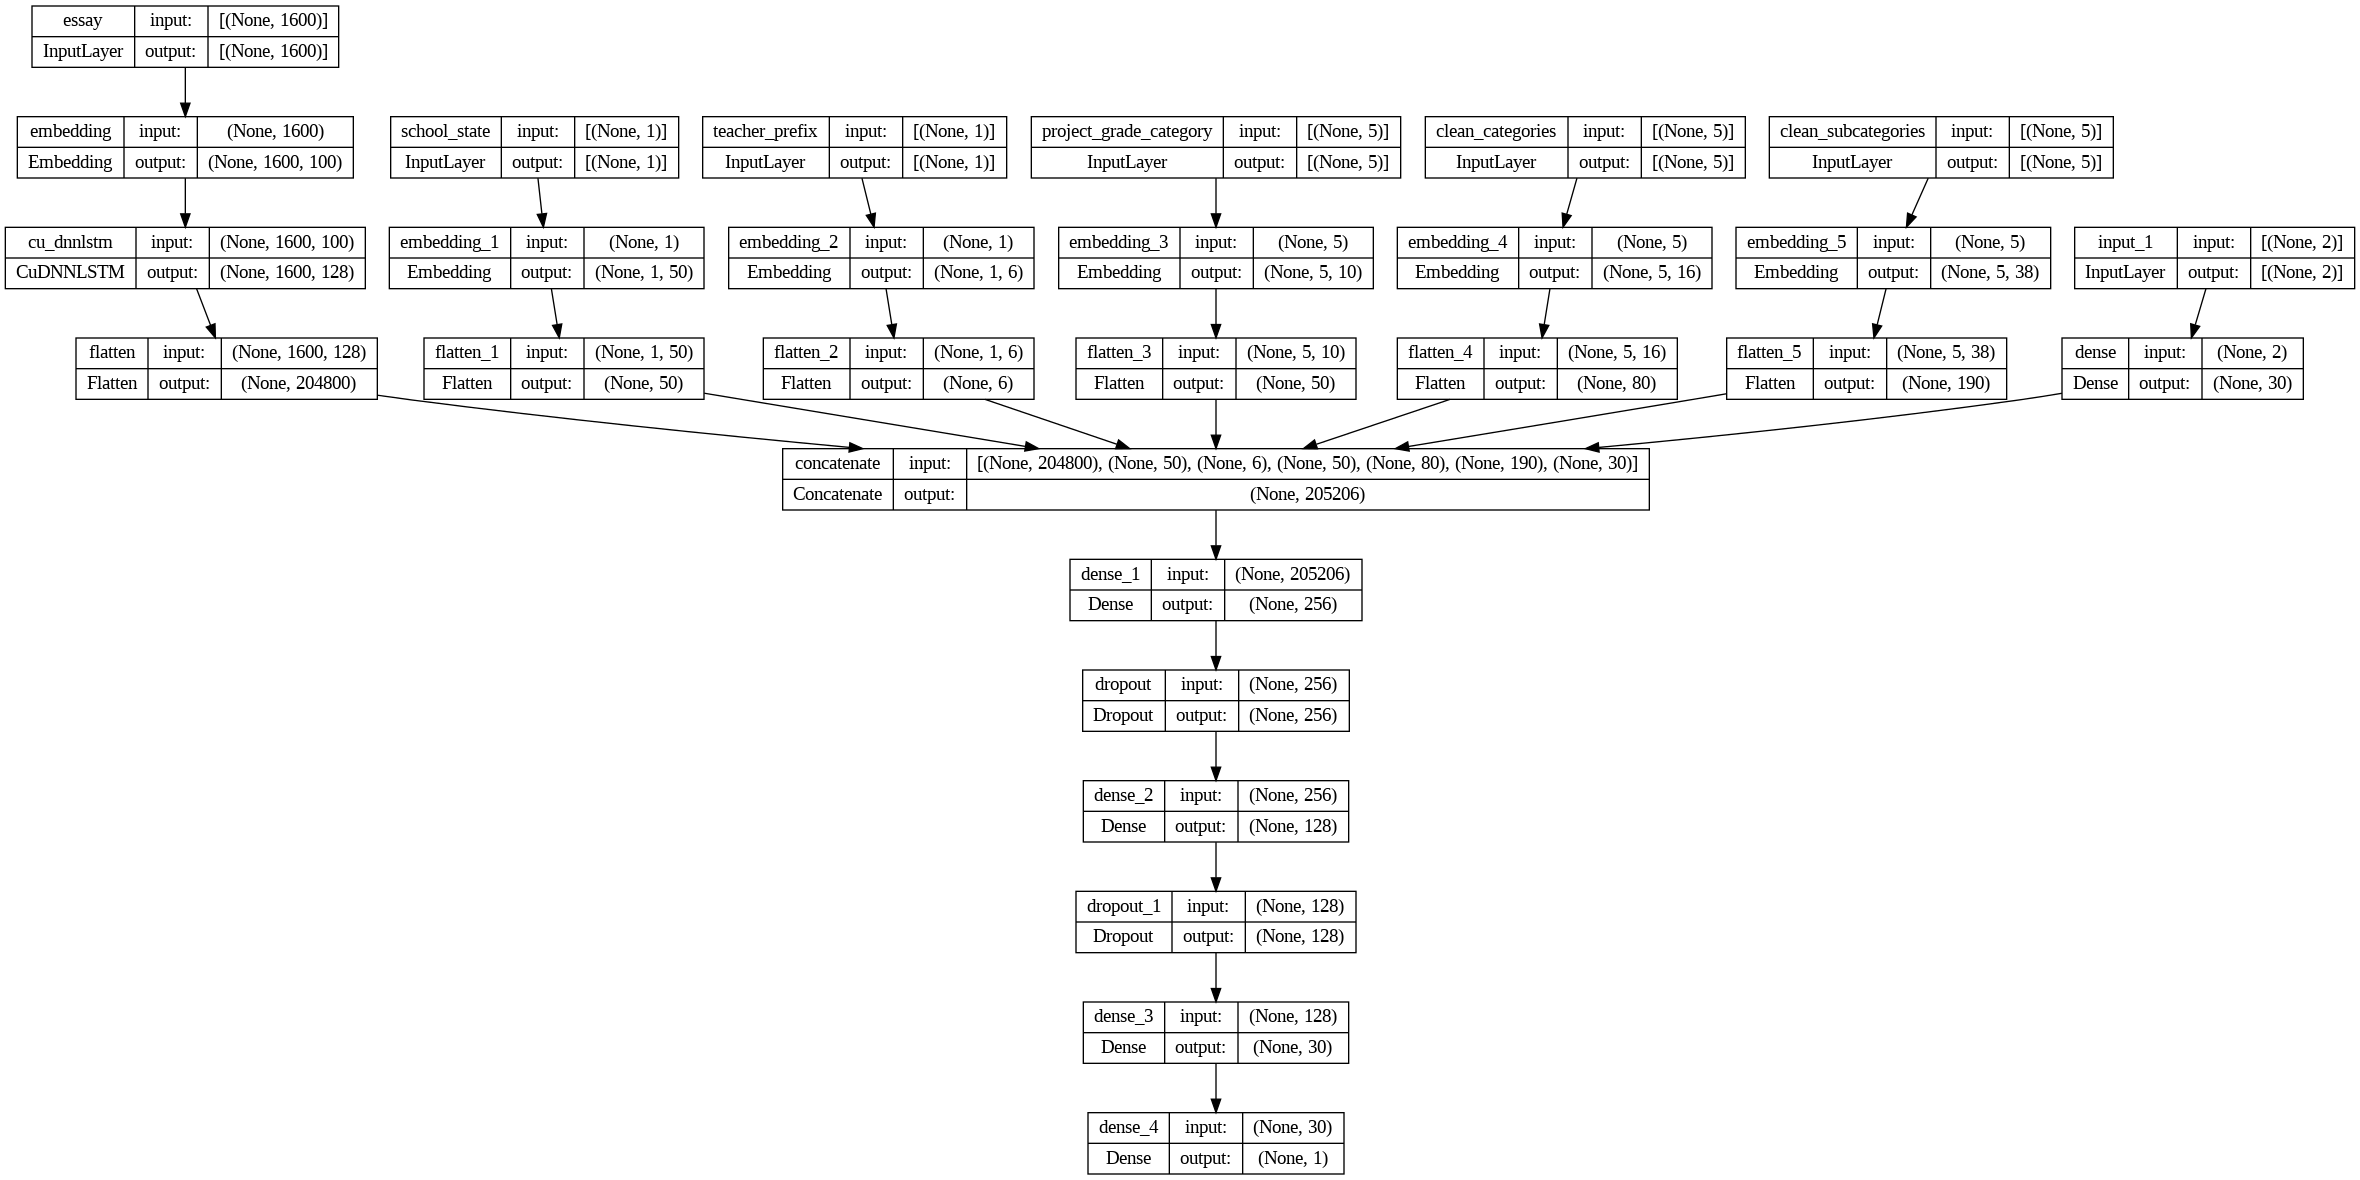

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
import datetime

%load_ext tensorboard
!rm -rf ./logs/ #removing any logs 

#model complilation
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True)

model.fit(x=x_training_data,
          y=y_train,
          validation_data =(x_validation_data,y_cv),
           epochs=3,
           batch_size=150,
           callbacks=[custom_callback,tensorboard_callback,checkpoint],
          verbose = 1)


Epoch 1/3


InvalidArgumentError: ignored

In [ ]:
y_pred_test = np.array(model.predict(x_testing_data))
auc_score = roc_auc_score(y_test,y_pred_test)
print("AUC score for test data",auc_score)

512/512 [==============================] - 16s 31ms/step
AUC score for test data 0.7346442465981198


### Model-2

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Train the TF-IDF on the Train data feature 'essay' <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

- **TF-IDF vectorizes/scores a word by multiplying the word's Term Frequency (TF) with the Inverse Document Frequency (IDF).**
- **Term Frequency:**  of a term or word is the number of times the term appears in a document compared to the total number    of words in the document.
- **Inverse Document Frequency:** IDF of a term reflects the proportion of documents in the corpus that contain the term.ords unique to a small percentage of documents (e.g., technical jargon terms) receive higher importance values than words common across all documents (e.g., a, the, and).

In [ ]:
#ref :https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer = 'word',use_idf=True) #If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens. Only applies if analyzer == 'word'.
tfidf.fit(x_train['essay'].values)

TfidfVectorizer()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxenplot of IDF values for essay words')

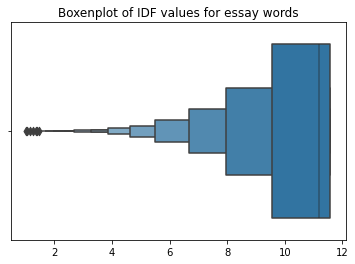

In [ ]:
sns.boxenplot(tfidf.idf_)
plt.title('Boxenplot of IDF values for essay words')

In [ ]:
print('25th Percentile :', np.percentile(tfidf.idf_, 25))
print('75th Percentile :', np.percentile(tfidf.idf_, 75))

25th Percentile : 9.56729043748975
75th Percentile : 11.582193458032013


In [ ]:
print(dict(zip(tfidf.get_feature_names(),tfidf.idf_)))

{'00': 7.187744303359575, '000': 5.903728791360102, '000s': 11.582193458032013, '001': 11.176728349923849, '002': 11.582193458032013, '003': 11.582193458032013, '005nannan': 11.582193458032013, '00am': 9.972755545597913, '00p': 11.582193458032013, '00pm': 10.07811606125574, '01': 10.889046277472067, '010': 11.582193458032013, '01075rm': 11.582193458032013, '01g': 11.582193458032013, '01ip': 11.176728349923849, '02': 11.176728349923849, '021': 11.582193458032013, '022x10': 11.582193458032013, '024': 11.582193458032013, '025': 11.582193458032013, '02810010': 11.582193458032013, '03': 10.195899096912122, '030': 11.582193458032013, '04': 11.176728349923849, '041': 11.582193458032013, '04112016': 11.582193458032013, '047': 11.582193458032013, '05': 10.483581169363903, '050': 11.176728349923849, '059': 11.582193458032013, '05pm': 11.582193458032013, '06': 11.176728349923849, '060': 11.582193458032013, '07': 11.176728349923849, '072': 11.582193458032013, '076': 11.582193458032013, '077': 11.5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
len(tfidf.get_feature_names())

49626

In [ ]:
from tqdm.notebook import tqdm

vocab = []

for idf_value, word in tqdm(zip(tfidf.idf_, tfidf.get_feature_names())):
    if idf_value < 5 or idf_value > 11 :
        vocab.append(word)
print()
print("After filtering the idf values",len(vocab))
print()
print("sample data",vocab[:5])        

0it [00:00, ?it/s]


After filtering the idf values 26068

sample data ['000s', '001', '002', '003', '005nannan']


In [ ]:
train_essay = []

for text in tqdm(x_train['essay'].values):
  text_word_list = [word for word in text.split() if word in vocab]
  train_essay.append(' '.join(text_word_list))   

print(len(train_essay))

  0%|          | 0/78852 [00:00<?, ?it/s]

78852


In [ ]:
#ref:https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html
tokenizer_idf = tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{"}~\t\n',
               lower=True)
tokenizer_idf.fit_on_texts(train_essay) #------>Updates internal vocabulary based on a list of texts

vocabulary_size = len(tokenizer_idf.word_index) + 1
print("vocabulary size = ",vocabulary_size)
print(type(vocabulary_size))

vocabulary size =  26069
<class 'int'>


In [ ]:
seq_len =[len(s) for s in train_essay]
seq_len.sort(reverse = True)
print("Max number of words in entire text data is: ",seq_len[0])
print("Min number of words in entire text data is :",seq_len[-1])

print("90 percentile value: ",np.percentile(np.array(seq_len), 90))
print("95 percentile value: ",np.percentile(np.array(seq_len), 95))
print("98 percentile value: ",np.percentile(np.array(seq_len), 98))

Max number of words in entire text data is:  2169
Min number of words in entire text data is : 310
90 percentile value:  1109.0
95 percentile value:  1226.0
98 percentile value:  1358.0


In [ ]:
x_train_token  = tokenizer.texts_to_sequences(train_essay)  #----->Transforms each text in texts to a sequence of integers.
x_test_token = tokenizer.texts_to_sequences(x_test['essay'].values)
x_cv_token  = tokenizer.texts_to_sequences(x_cv['essay'].values)

print(len(x_cv_token))

13916


In [ ]:
maximum_len = 1200

x_train_idf = pad_sequences(x_train_token,maxlen=maximum_len,padding='post')
x_test_idf = pad_sequences(x_test_token,maxlen=maximum_len,padding='post')
x_cv_pad_idf = pad_sequences(x_cv_token,maxlen=maximum_len,padding='post')

print(x_cv_pad_idf[900])
print(x_cv_pad_idf[0].shape)

[  2  49 114 ...   0   0   0]
(1200,)


In [ ]:
from tqdm.notebook import tqdm

def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

model = loadGloveModel('/content/glove.6B/glove.6B.100d.txt')

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocabulary_size, 100))
for word, i in tqdm(tokenizer_idf.word_index.items()):
	embedding_vector = model.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

print(len(embedding_matrix))
print()
print(embedding_matrix.shape)

Loading Glove Model


0it [00:00, ?it/s]

Done. 400000  words loaded!


  0%|          | 0/26068 [00:00<?, ?it/s]

26069

[-4.5381e-01 -7.3266e-03  2.7498e-01 -1.7127e-01 -5.1537e-02 -2.9775e-01
  3.7811e-01 -1.4483e-01  2.6495e-01 -8.8757e-01 -2.2609e-01  2.9052e-01
  3.6349e-01  2.0240e-01  7.1972e-02  8.5633e-02  4.5294e-02  4.0742e-02
  3.8501e-01 -1.7440e-01 -1.5048e-01 -1.7721e-01 -9.0713e-02  3.7993e-01
 -3.7992e-01  1.9104e-01 -1.4939e-02  7.0321e-01  3.4303e-01 -2.3860e-01
  7.4464e-01 -3.2792e-01 -6.8513e-02  2.3748e-01 -8.0425e-01 -4.5078e-01
  5.1520e-02 -2.2484e-02  4.8650e-01 -4.3590e-01  3.7630e-01 -6.6222e-01
 -6.6605e-01  3.3284e-02 -7.6836e-02  2.6282e-01 -1.4004e-01  4.4816e-01
  1.0621e-01 -7.3085e-01  1.9111e-01 -3.2469e-01  1.5076e-01 -4.0597e-01
  9.9994e-02  3.5910e-01  5.5071e-01  8.3778e-04  3.4233e-02  1.2503e-01
  3.2200e-02  9.2035e-02  8.9842e-02  2.7384e-01 -1.5654e-01 -3.2289e-01
  3.4151e-01 -7.9528e-02 -8.8268e-01 -1.3222e-01 -4.7757e-01 -3.4226e-01
 -3.5638e-01  1.0897e-01  1.5238e-02 -1.3648e-01  2.5887e-01  6.5983e-01
  2.4587e-01 -1.8407e-01  1.9515e-02 -8.0362

In [ ]:
#embedding layer for essay 
Input_seq_total_text_data = Input(shape= maximum_len, dtype='int32',name='essay')
embedding_layer_essay = Embedding(len(tokenizer_idf.word_index)+1,100,weights = [embedding_matrix],trainable=False)(Input_seq_total_text_data)
lstm_idf = CuDNNLSTM(128,return_sequences=True)(embedding_layer_essay)
lstm_flatten_idf = Flatten()(lstm_idf)

In [ ]:
#concatenating above embeddings layers and numeric dense layer
concatenate = Concatenate()([lstm_flatten_idf,
                        school_state,
                        teacher_prefix,
                        project_grade_category,
                        clean_categories,
                        clean_subcategories,
                        numeric_dense])


x = Dense(128,activation = 'relu',kernel_initializer=GlorotUniform(),kernel_regularizer=tf.keras.regularizers.l2(0.001))(concatenate)
x = Dropout(0.5)(x)

x = Dense(64,activation='relu',kernel_initializer=GlorotUniform(),kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)

x = Dense(32,activation='relu',kernel_initializer=GlorotUniform(),kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)


output_layer = Dense(1, activation = 'sigmoid')(x)

model_2 = Model([Input_seq_total_text_data,
               Input_school_state,
               Input_teacher_prefix,
               Input_project_grade_category,
               Input_clean_categories,
               Input_clean_subcategories,
               numerical_input], output_layer)

model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 essay (InputLayer)             [(None, 1200)]       0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 1200, 300)    7820700     ['essay[0][0]']                  
                                                                                                  
 school_state (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 teacher_prefix (InputLayer)    [(None, 1)]          0           []                               
                                                                                            

In [ ]:
x_training_idf =(x_train_idf,
                  x_train_school_state_pad_seq,
                  x_train_teacher_prefix_pad_seq,
                  x_train_project_grade_category_pad_seq,
                  x_train_clean_categories_pad_seq,
                  x_train_clean_subcategories_pad_seq,
                  x_train_numeric)

x_validation_idf =(x_cv_pad_idf,
                    x_cv_school_state_pad_seq,
                    x_cv_teacher_prefix_pad_seq,
                    x_cv_project_grade_category_pad_seq,
                    x_cv_clean_categories_pad_seq,
                    x_cv_clean_subcategories_pad_seq,
                    x_cv_numeric)

x_testing_idf =(x_test_idf,
                 x_test_school_state_pad_seq,
                 x_test_teacher_prefix_pad_seq,
                 x_test_project_grade_category_pad_seq,
                 x_test_clean_categories_pad_seq,
                 x_test_clean_subcategories_pad_seq,
                 x_test_numeric)

In [ ]:
# model check
filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint_idf = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, 
                                                monitor='val_accuracy',  
                                                verbose=1, 
                                                save_best_only=True, 
                                                mode='max')


In [ ]:
from sklearn.metrics import roc_auc_score
class CustomCallback_idf(tf.keras.callbacks.Callback):
    def __init__(self):
        self.validation_data=(x_validation_idf,y_cv)
        self.x = x_training_idf
        self.y = y_train
        
    def on_train_begin(self, logs={}):
        self.auc_tr = []
        self.auc_te = []

    def on_epoch_end(self, epoch, logs={}):
        #prediction
        score_train = np.asarray(self.model.predict(self.x))
        score_test = np.asarray(self.model.predict(self.validation_data[0]))
        #calculating roc scores
        targ_train = self.validation_data[1]
        auc_train = roc_auc_score(self.y, score_train)
        auc_test = roc_auc_score(targ_train, score_test)
        self.auc_tr.append(auc_train)
        self.auc_te.append(auc_test)
        #print("  auc: "+"{:.4f}".format(auc));
        print(' roc-auc_train: %s - roc-auc_test: %s' % (str(round(auc_train,4)),str(round(auc_test,4))))
        
custom_callback_idf =  CustomCallback_idf()     

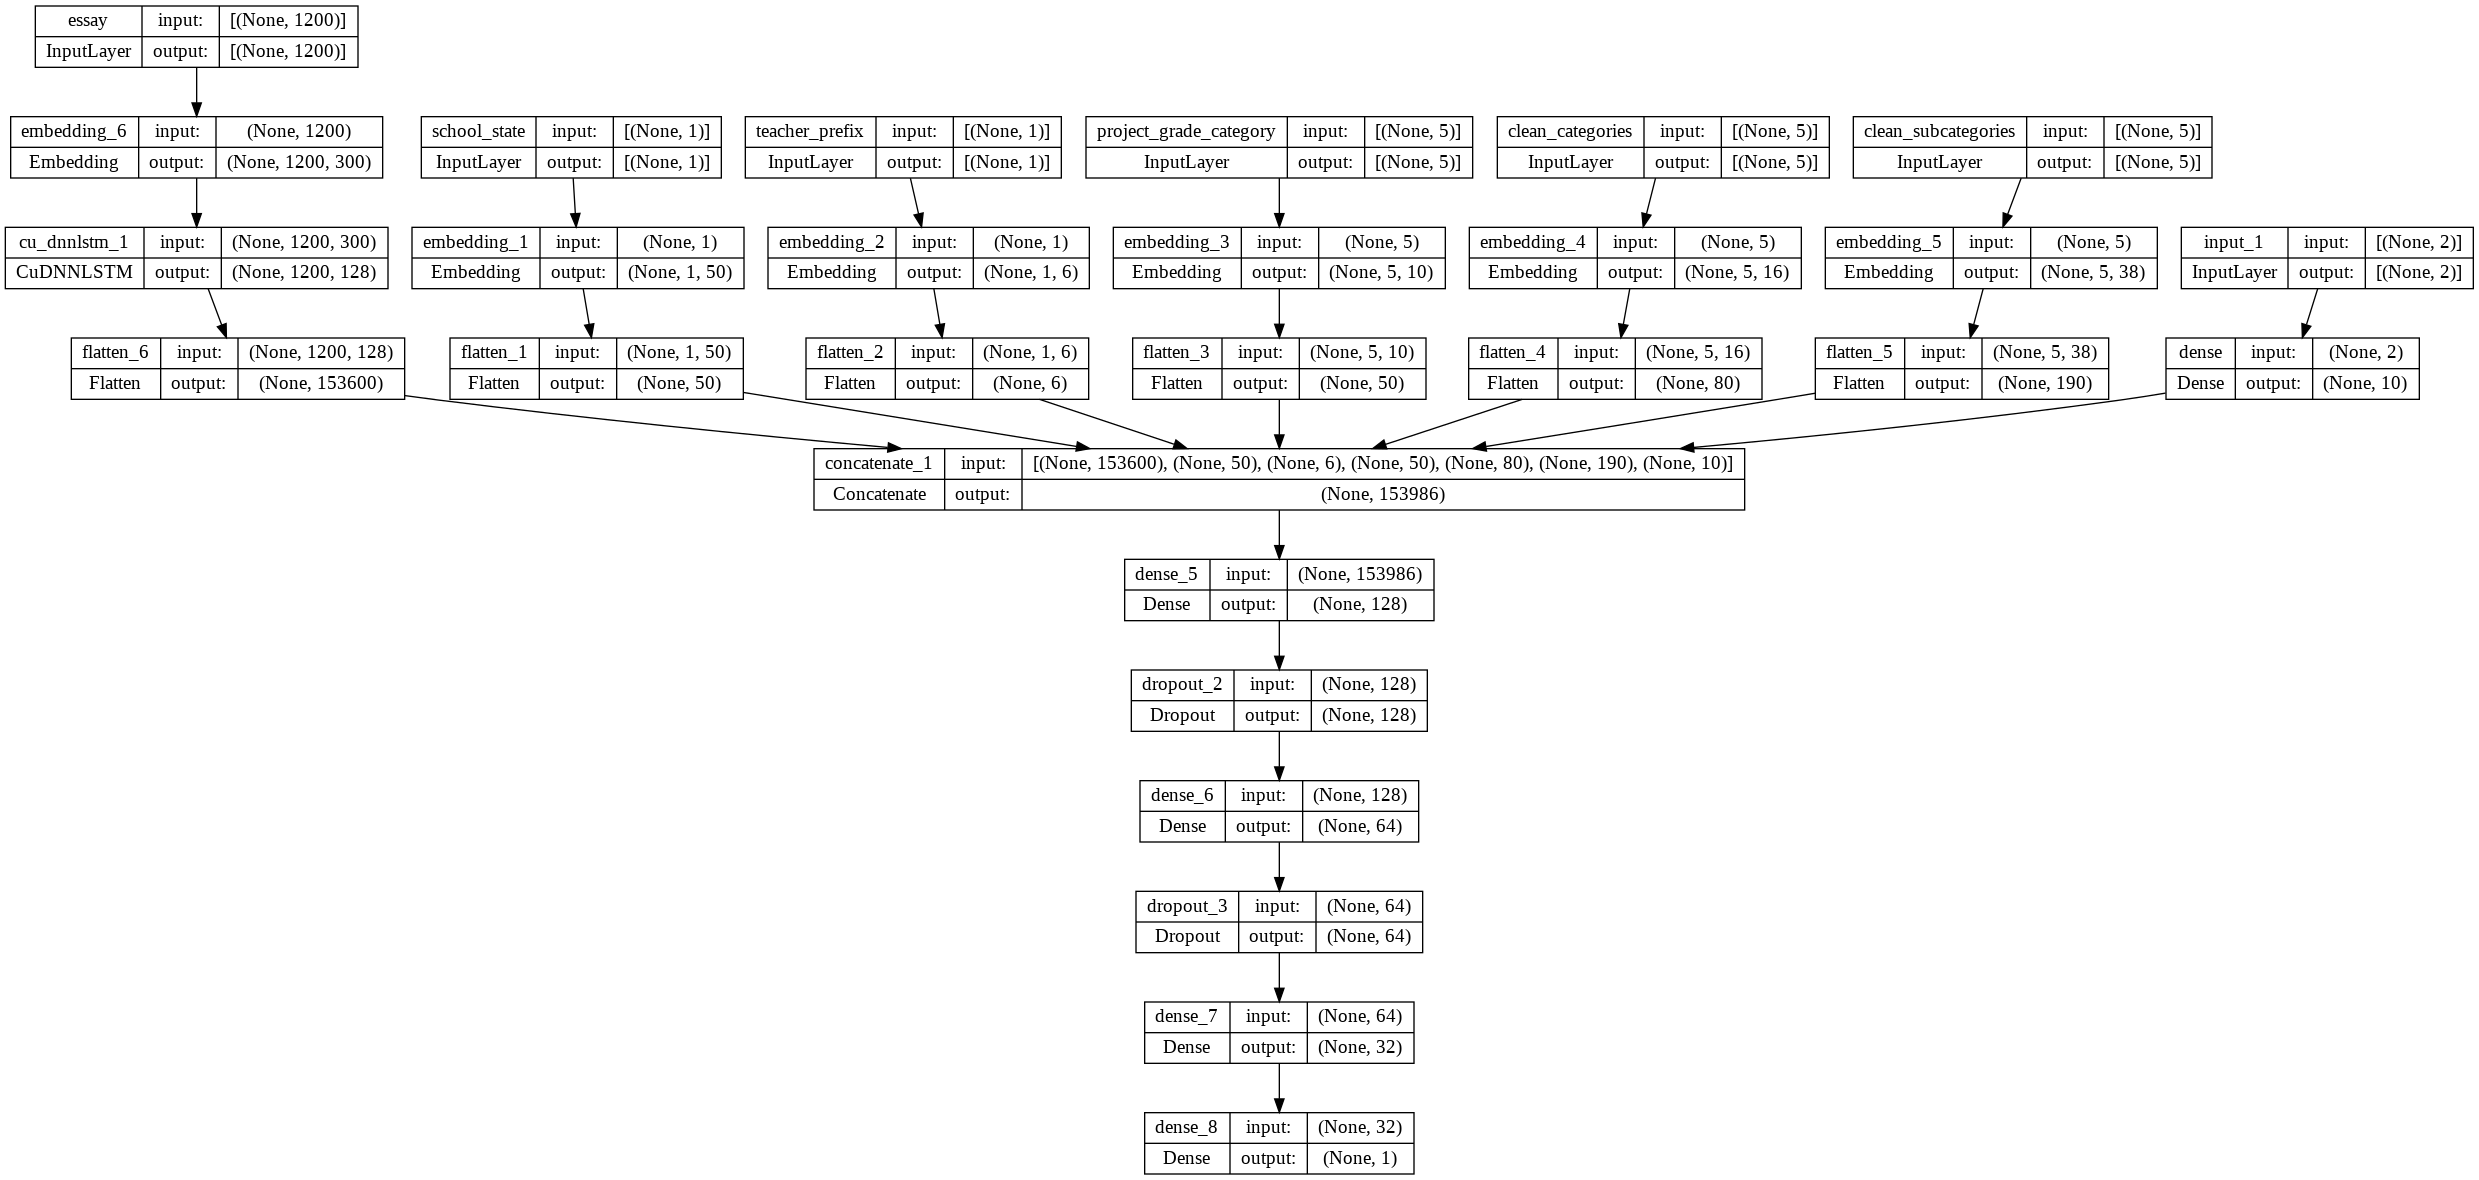

In [ ]:
plot_model(model_2, "model_2.png", show_shapes=True)

In [ ]:
!rm -r 'content/logs'

In [ ]:
import datetime

%load_ext tensorboard
!rm -r ./logs/ #removing any logs 

#model complilation
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True)

model_2.fit(x=x_training_idf,
          y=y_train,
          validation_data =(x_validation_idf,y_cv),
           epochs=5,
           batch_size=100,
           callbacks=[custom_callback_idf,tensorboard_callback,checkpoint_idf],
          verbose = 1)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/5
435/435 [==============================] - 10s 24ms/step
 roc-auc_train: 0.6976 - roc-auc_test: 0.6606

Epoch 1: val_accuracy improved from -inf to 0.84845, saving model to model_save/weights-01-0.8484.hdf5
789/789 [==============================] - 199s 249ms/step - loss: 0.5506 - accuracy: 0.8475 - val_loss: 0.4714 - val_accuracy: 0.8484
Epoch 2/5
435/435 [==============================] - 11s 24ms/step
 roc-auc_train: 0.7251 - roc-auc_test: 0.6864

Epoch 2: val_accuracy did not improve from 0.84845
789/789 [==============================] - 176s 223ms/step - loss: 0.4502 - accuracy: 0.8484 - val_loss: 0.4389 - val_accuracy: 0.8484
Epoch 3/5
435/435 [==============================] - 10s 24ms/step
 roc-auc_train: 0.7372 - roc-auc_test: 0.6974

Epoch 3: val_accuracy did not improve from 0.84845
789/789 [==============================] - 199s 252ms/step - loss: 0.4301 - accuracy: 0.8484 

In [ ]:
import pickle 
train_idf = open('train_idf', 'wb')
pickle.dump(train_essay, train_idf)                     
train_idf.close()

In [ ]:
y_pred_test = np.array(model_2.predict(x_testing_idf))
auc_score = roc_auc_score(y_test,y_pred_test)
print("AUC score for test data",auc_score)

512/512 [==============================] - 13s 26ms/step
AUC score for test data 0.6990325175436993


### Model-3

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>

In [ ]:
x_train[:2]

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
23538,nj,mrs,grades_prek_2,1,health_sports,gym_fitness health_wellness,i love teaching kindergarten like many kinderg...,279.98
89198,ca,ms,grades_6_8,51,math_science health_sports,health_lifescience teamsports,our students represent diversified school we s...,117.41


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_state_ohe = vectorizer.transform(x_train['school_state'].values)
x_cv_state_ohe = vectorizer.transform(x_cv['school_state'].values)
x_test_state_ohe = vectorizer.transform(x_test['school_state'].values)

print("After vectorizations")
print(x_train_state_ohe.shape, y_train.shape)
print(x_cv_state_ohe.shape, y_cv.shape)
print(x_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(78852, 51) (78852,)
(13916, 51) (13916,)
(16371, 51) (16371,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_teacher_ohe = vectorizer.transform(x_train['teacher_prefix'].values)
x_cv_teacher_ohe = vectorizer.transform(x_cv['teacher_prefix'].values)
x_test_teacher_ohe = vectorizer.transform(x_test['teacher_prefix'].values)

print("After vectorizations")
print(x_train_teacher_ohe.shape, y_train.shape)
print(x_cv_teacher_ohe.shape, y_cv.shape)
print(x_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(78852, 5) (78852,)
(13916, 5) (13916,)
(16371, 5) (16371,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_proj_ohe = vectorizer.transform(x_train['project_grade_category'].values)
x_cv_proj_ohe = vectorizer.transform(x_cv['project_grade_category'].values)
x_test_proj_ohe = vectorizer.transform(x_test['project_grade_category'].values)

print("After vectorizations")
print(x_train_proj_ohe.shape, y_train.shape)
print(x_cv_proj_ohe.shape, y_cv.shape)
print(x_test_proj_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(78852, 4) (78852,)
(13916, 4) (13916,)
(16371, 4) (16371,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_cc_ohe = vectorizer.transform(x_train['clean_categories'].values)
x_cv_cc_ohe = vectorizer.transform(x_cv['clean_categories'].values)
x_test_cc_ohe = vectorizer.transform(x_test['clean_categories'].values)

print("After vectorizations")
print(x_train_cc_ohe.shape, y_train.shape)
print(x_cv_cc_ohe.shape, y_cv.shape)
print(x_test_cc_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(78852, 9) (78852,)
(13916, 9) (13916,)
(16371, 9) (16371,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_csc_ohe = vectorizer.transform(x_train['clean_subcategories'].values)
x_cv_csc_ohe = vectorizer.transform(x_cv['clean_subcategories'].values)
x_test_csc_ohe = vectorizer.transform(x_test['clean_subcategories'].values)

print("After vectorizations")
print(x_train_csc_ohe.shape, y_train.shape)
print(x_cv_csc_ohe.shape, y_cv.shape)
print(x_test_csc_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(78852, 30) (78852,)
(13916, 30) (13916,)
(16371, 30) (16371,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

teacher_number_scalar = StandardScaler()
teacher_number_scalar.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 
x_train_teacher_number_of_previously_posted_project = teacher_number_scalar.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
x_test_teacher_number_of_previously_posted_project = teacher_number_scalar.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
x_cv_teacher_number_of_previously_posted_project = teacher_number_scalar.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))


normalizer = StandardScaler()
normalizer.fit(x_train['price'].values.reshape(1,-1))
x_train_price_norm = normalizer.transform(x_train['price'].values.reshape(1,-1))
x_test_price_norm = normalizer.fit_transform(x_test['price'].values.reshape(1,-1))
x_cv_price_norm = normalizer.fit_transform(x_cv['price'].values.reshape(1,-1))

# to cancatenate numeric feature reshaping array
x_train_price_norm =x_train_price_norm.reshape(-1,1)
x_test_price_norm =x_test_price_norm.reshape(-1,1)
x_cv_price_norm =x_cv_price_norm.reshape(-1,1)

In [ ]:
from scipy.sparse import hstack
x_train_ohe = hstack((x_train_state_ohe, x_train_teacher_ohe, x_train_proj_ohe,x_train_cc_ohe,x_train_csc_ohe, x_train_price_norm,x_train_teacher_number_of_previously_posted_project)).toarray()
x_test_ohe =  hstack((x_test_state_ohe, x_test_teacher_ohe, x_test_proj_ohe,x_test_cc_ohe,x_test_csc_ohe, x_test_price_norm,x_test_teacher_number_of_previously_posted_project)).toarray()
x_cv_ohe =    hstack((x_cv_state_ohe, x_cv_teacher_ohe, x_cv_proj_ohe,x_cv_cc_ohe,x_cv_csc_ohe, x_cv_price_norm,x_cv_teacher_number_of_previously_posted_project)).toarray()

print("Final Data matrix")
print(x_train_ohe.shape, y_train.shape)
print(x_test_ohe.shape, y_test.shape)
print(x_cv_ohe.shape, y_test.shape)

print("="*100)

Final Data matrix
(78852, 101) (78852,)
(16371, 101) (16371,)
(13916, 101) (16371,)


In [ ]:
Input_cat_data = Input(shape=(101,1))
cov1 = layers.Conv1D(128,3,activation='relu')(Input_cat_data)
cov2 = layers.Conv1D(64,3,activation='relu')(cov1)
flatten2 = Flatten()(cov2)

In [ ]:
max_len = 1800

print("Before tokenization:" ,x_train.essay[5])
print()
print("Performing tokenization...")
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(x_train['essay'].values) #------>Updates internal vocabulary based on a list of texts

x_train_token  = tokenizer.texts_to_sequences(x_train['essay'].values)  #----->Transforms each text in texts to a sequence of integers.
x_test_token = tokenizer.texts_to_sequences(x_test['essay'].values)
x_cv_token  = tokenizer.texts_to_sequences(x_cv['essay'].values)

vocab_size = len(tokenizer.word_index) + 1
print("vocabulary size = ",vocab_size)
print("After tokenization: ",x_train_token[5])

#padding the text data 
print("Before padding ",len(x_train_token[5]))
print()
print("Performing padding...")
x_train_pad_seq = tf.keras.utils.pad_sequences(sequences = x_train_token,
                                       maxlen=max_len,
                                       padding='post'
                                      )

x_test_pad_seq= tf.keras.utils.pad_sequences(sequences = x_test_token,
                                       maxlen=max_len,
                                       padding='post'
                                      )

x_cv_pad_seq = tf.keras.utils.pad_sequences(sequences = x_cv_token,
                                       maxlen=max_len,
                                       padding='post'
                                      )

print("After padding ",len(x_train_pad_seq[5]))

from tqdm.notebook import tqdm

def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

model = loadGloveModel('/content/glove.6B/glove.6B.100d.txt')

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tqdm(tokenizer.word_index.items()):
	embedding_vector = model.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

print(len(embedding_matrix))
print()
print(embedding_matrix.shape)

#embedding layer for essay 
Input_seq_total_text_data = Input(shape= max_len, dtype='int32',name='essay')
embedding_layer_essay = Embedding(len(tokenizer.word_index)+1,100,weights = [embedding_matrix],trainable=False)(Input_seq_total_text_data)
lstm = CuDNNLSTM(128,return_sequences=True)(embedding_layer_essay)
lstm_flatten = Flatten()(lstm)


Before tokenization: it end school year routines run course students need boost curriculum enter breakout box my students prove knowledge content solving riddles finding clues lead unlocking box prize my students desire challenges movement collaboration they thrive rigor far successful content engaging rich still fun my students working developing teammates one works best group i work school holds bar student achievement high i would like raise bar even breakout box i design different clues using specific content knowledge get students solve puzzles search unlocking breakout box this activity used subject areas students working teams whole class even individually i able use materials year round review content unit fun engaging way keeps students highly motivated prove learning donations project immediately improve classroom changing routines students end long difficult year behaviors begin become issue a breakout box provide us fun interactive way break routine still build cognitive sw

0it [00:00, ?it/s]

Done. 400000  words loaded!


  0%|          | 0/49662 [00:00<?, ?it/s]

49663

[-4.5381e-01 -7.3266e-03  2.7498e-01 -1.7127e-01 -5.1537e-02 -2.9775e-01
  3.7811e-01 -1.4483e-01  2.6495e-01 -8.8757e-01 -2.2609e-01  2.9052e-01
  3.6349e-01  2.0240e-01  7.1972e-02  8.5633e-02  4.5294e-02  4.0742e-02
  3.8501e-01 -1.7440e-01 -1.5048e-01 -1.7721e-01 -9.0713e-02  3.7993e-01
 -3.7992e-01  1.9104e-01 -1.4939e-02  7.0321e-01  3.4303e-01 -2.3860e-01
  7.4464e-01 -3.2792e-01 -6.8513e-02  2.3748e-01 -8.0425e-01 -4.5078e-01
  5.1520e-02 -2.2484e-02  4.8650e-01 -4.3590e-01  3.7630e-01 -6.6222e-01
 -6.6605e-01  3.3284e-02 -7.6836e-02  2.6282e-01 -1.4004e-01  4.4816e-01
  1.0621e-01 -7.3085e-01  1.9111e-01 -3.2469e-01  1.5076e-01 -4.0597e-01
  9.9994e-02  3.5910e-01  5.5071e-01  8.3778e-04  3.4233e-02  1.2503e-01
  3.2200e-02  9.2035e-02  8.9842e-02  2.7384e-01 -1.5654e-01 -3.2289e-01
  3.4151e-01 -7.9528e-02 -8.8268e-01 -1.3222e-01 -4.7757e-01 -3.4226e-01
 -3.5638e-01  1.0897e-01  1.5238e-02 -1.3648e-01  2.5887e-01  6.5983e-01
  2.4587e-01 -1.8407e-01  1.9515e-02 -8.0362

In [ ]:
#concatenating above embeddings layers and numeric dense layer
concatenate = Concatenate()([lstm_flatten,
                             flatten2])


x = Dense(100,activation = 'relu',kernel_initializer='he_normal')(concatenate)
x = Dropout(0.5)(x)

x = Dense(70,activation='relu',kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)

x = Dense(30,activation='relu',kernel_initializer='he_normal')(x)


output_layer = Dense(1, activation = 'sigmoid')(x)

model_3 = Model([Input_seq_total_text_data,
                 Input_cat_data], 
                output_layer)



model_3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 essay (InputLayer)             [(None, 1800)]       0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 101, 1)]     0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1800, 300)    14898900    ['essay[0][0]']                  
                                                                                                  
 conv1d (Conv1D)                (None, 99, 128)      512         ['input_1[0][0]']                
                                                                                              

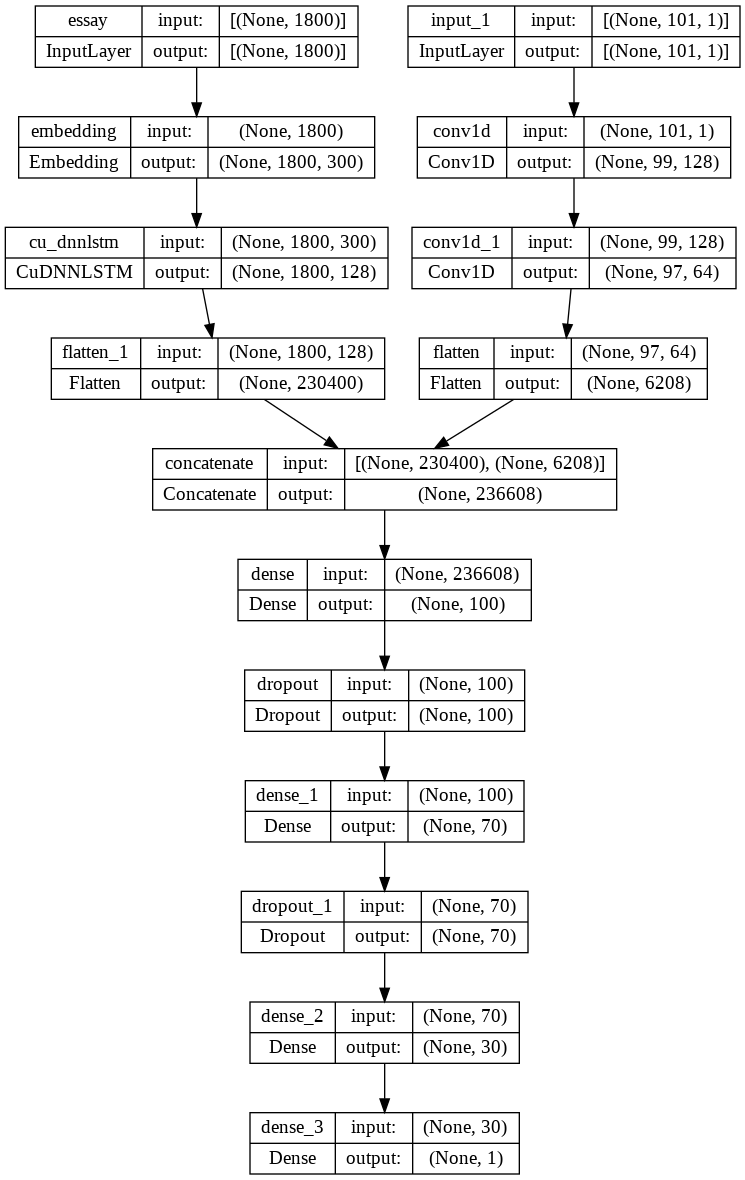

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_3, "model_3.png", show_shapes=True)

In [ ]:
x_train_ohe =(x_train_pad_seq,
                  x_train_ohe)

x_cv_ohe =(x_cv_pad_seq,
                    x_cv_ohe)

x_test_ohe =(x_test_pad_seq,
                 x_test_ohe)

In [ ]:
# model check
filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint_ohe = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, 
                                                monitor='val_accuracy',  
                                                verbose=1, 
                                                save_best_only=True, 
                                                mode='max')


In [ ]:
from sklearn.metrics import roc_auc_score
class CustomCallback_ohe(tf.keras.callbacks.Callback):
    def __init__(self):
        self.validation_data=(x_cv_ohe,y_cv)
        self.x = x_train_ohe
        self.y = y_train
        
    def on_train_begin(self, logs={}):
        self.auc_tr = []
        self.auc_te = []

    def on_epoch_end(self, epoch, logs={}):
        #prediction
        score_train = np.asarray(self.model.predict(self.x))
        score_test = np.asarray(self.model.predict(self.validation_data[0]))
        #calculating roc scores
        targ_train = self.validation_data[1]
        auc_train = roc_auc_score(self.y, score_train)
        auc_test = roc_auc_score(targ_train, score_test)
        self.auc_tr.append(auc_train)
        self.auc_te.append(auc_test)
        #print("  auc: "+"{:.4f}".format(auc));
        print(' roc-auc_train: %s - roc-auc_test: %s' % (str(round(auc_train,4)),str(round(auc_test,4))))
        
custom_callback_ohe =  CustomCallback_ohe()     

In [ ]:
import datetime

%load_ext tensorboard
!rm -rf ./logs/ #removing any logs 
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True)

model_3.fit(x=x_train_ohe,
            y=y_train,
          validation_data =(x_cv_ohe,y_cv),
           epochs=3,
            batch_size=128,
           callbacks=[custom_callback_ohe,tensorboard_callback,checkpoint_ohe],
          verbose = 1)

Epoch 1/3
435/435 [==============================] - 14s 33ms/step
 roc-auc_train: 0.7323 - roc-auc_test: 0.7209

Epoch 1: val_accuracy improved from -inf to 0.84845, saving model to model_save/weights-01-0.8484.hdf5
617/617 [==============================] - 225s 345ms/step - loss: 0.4255 - accuracy: 0.8454 - val_loss: 0.4049 - val_accuracy: 0.8484
Epoch 2/3
435/435 [==============================] - 14s 32ms/step
 roc-auc_train: 0.7541 - roc-auc_test: 0.7426

Epoch 2: val_accuracy did not improve from 0.84845
617/617 [==============================] - 214s 346ms/step - loss: 0.3930 - accuracy: 0.8485 - val_loss: 0.4133 - val_accuracy: 0.8484
Epoch 3/3
435/435 [==============================] - 14s 32ms/step
 roc-auc_train: 0.7855 - roc-auc_test: 0.7452

Epoch 3: val_accuracy did not improve from 0.84845
617/617 [==============================] - 213s 345ms/step - loss: 0.3812 - accuracy: 0.8491 - val_loss: 0.4055 - val_accuracy: 0.8484


In [ ]:
y_pred_test = np.array(model_3.predict(x_test_ohe))
auc_score = roc_auc_score(y_test,y_pred_test)
print("AUC score for test data",auc_score)

512/512 [==============================] - 17s 33ms/step
AUC score for test data 0.7503873934341602


In [ ]:
model_3.fit(x=x_train_ohe,
            y=y_train,
          validation_data =(x_cv_ohe,y_cv),
           epochs=5,
            batch_size=128,
           callbacks=[custom_callback_ohe,tensorboard_callback,checkpoint_ohe],
          verbose = 1)

Epoch 1/5
435/435 [==============================] - 14s 32ms/step
 roc-auc_train: 0.8161 - roc-auc_test: 0.75
